# Construccion de un Clasificador

## Presentacion del problema

Una de las mayores perdidas de una compañia de seguros estan representadas por las polizas que aun dadas de alta, no pueden cobrar ninguna de sus cuotas en los primeros tres meses de vigencia, motivo por el cual inmediatamente la misma se anula.

Esto se conoce dentro del rubro como <b>Lapse 90</b>

El objetivo de este trabajo, es encontrar un modelo que prediga la probabilidad de que una poliza caiga dentro de esta clasificacion, con el objetivo de poder realizar alguna accion preventiva, evitando que la poliza se anule.

## Armado del dataset

En base a los datos presentes en la compañia, se genero una muestra representativa de una dataset de todas las polizas vigentes, y aquellas que fueron anuladas por Lapse 90.
La muestra comprende 300.000 polizas del canal comercial Tarjeta Naranja.

Se adjunta el codigo SQL utilizado para generar el dataset, y la muestra aleatoria del mismo.

# EDA

In [5]:
# Importamos las librerias basicas de python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df

#file = 'C:/Users/Ramiro/Desktop/Digital House/Desafios/Desafio 3/Churn Naranja Muestra.csv'

file = 'C:/Users/rharari/Desktop/Data Science/Desafio 3/Churn Naranja Muestra.csv'

# Creamos un DataFrame con la info del csv
df = pd.read_csv(file, sep='\t', encoding='ANSI')

In [7]:
#Veamos algunos datos del dataset

df.head()

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
0,232-405557-2407376,405557,2407376,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,30.81,1,0,30900513,Masculino,34,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
1,301-100618-390797,100618,390797,301,SVC Tarjetas con Cl Ajuste,Vida Colectivo,Vigente,36.03,1,0,33920078,Femenino,30,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
2,304-100723-73514,100723,73514,304,SVC T.Naranja Todos Venden,Vida Colectivo,Vigente,62.00,0,0,26459882,Femenino,40,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
3,232-405557-2355690,405557,2355690,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,37.19,1,0,17794433,Femenino,52,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
4,232-405557-1165633,405557,1165633,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Vigente,36.04,1,0,30851203,Masculino,34,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


Podemos observar que el dataset contiene datos relacionados a la poliza en si, y datos referentes al cliente titular de cada poliza.
Asimismo, notamos que cada poliza es una observacion dentro del dataframe.

In [8]:
#Veamos un poco como esta compuesto el dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
Solicitud_Contrato    300000 non-null object
npoliza               300000 non-null int64
ncertificado          300000 non-null int64
ncproducto            300000 non-null int64
Producto              300000 non-null object
Ramo                  300000 non-null object
Estado                300000 non-null object
Premio                300000 non-null float64
Producto_Masivo       300000 non-null int64
Lapse_90              300000 non-null int64
cdocumento            300000 non-null int64
cdSexo                300000 non-null object
Edad                  300000 non-null int64
cdProvincia           300000 non-null object
Medio_Venta_H         300000 non-null object
Punto_Venta_H         300000 non-null object
Puesto_Venta_H        300000 non-null object
Rentabilidad          300000 non-null object
Segmento              300000 non-null object
dtypes: float64(1), int64(7), object(11)

Podemos observar que el mismo contiene 300.000 observaciones, de las cuales no hay valores nulos.

Esto nos facilita trabajar con el mismo, ya que evita que tengamos que hacer una limpieza masiva de datos, o manipularlo demasiado previamente.

In [9]:
# Veamos algunos estadisticos del DF

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.643175,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.181655,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,-678.100000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.897500,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Notamos que hay polizas con premios negativos, seguramente por errores de carga.

In [10]:
df[df['Premio']<0]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
30877,232-405557-2535161,405557,2535161,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14459770,Masculino,57,Corrientes,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Con Financ.
33049,304-100723-226275,100723,226275,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,26551328,Masculino,40,Rio Negro,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q4,Mixto Con Financ.Z
58591,232-405557-2418095,405557,2418095,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,14660462,Masculino,56,Tucuman,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Tx Sin Financ.
61872,304-100723-178819,100723,178819,304,SVC T.Naranja Todos Venden,Vida Colectivo,Anulada,-62.00,0,1,35650450,Femenino,27,Santa Fe,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q2,Mixto Con Financ.Z
67492,232-405557-2483729,405557,2483729,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-30.81,1,1,18268033,Femenino,52,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q5,Sin Segmento
96355,232-405557-2324087,405557,2324087,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,29340183,Masculino,36,Santiago del Estero,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Tx Con Financ.
97859,3075-102903-155263,102903,155263,3075,Seguro de Compra T.Naranja,Riesgos Varios,Anulada,-125.00,0,1,5332990,Femenino,67,Dato Erroneo,Telemarketing (MV),Externo (PunV),Deelo IN (PueV),Q5,Esporadico
103604,232-405557-2238792,405557,2238792,232,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,Anulada,-22.75,1,1,39169302,Femenino,22,Buenos Aires,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Completos
109046,241-1221298-0,1221298,0,241,AP Capital Uni. Amer. Assist,Accidentes Personales,Anulada,-222.16,0,1,10146252,Masculino,66,Chubut,Telemarketing (MV),Externo (PunV),PyD (PueV),Q5,Mixto
128276,2045-1849613-0,1849613,0,2045,SH PLUS Tarjetas Regionales,Combinado Familiar,Anulada,-364.77,0,1,27149634,Femenino,39,Santa Fe,Telemarketing (MV),Externo (PunV),DDM (PueV),Q3,Mixto


Por el conocimiento que tenemos del negocio, notamos que los montos de los premios son coherentes, por lo cual vamos a invertir el signo de los mismos para arreglar la feature.

In [11]:
df.loc[df['Premio']<0,'Premio'] = -df.loc[df['Premio']<0,'Premio']

In [12]:
#Verificamos que haya quedado corregido

df.describe()

,npoliza,ncertificado,ncproducto,Premio,Producto_Masivo,Lapse_90,cdocumento,Edad
count,3.000000e+05,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,300000.000000
mean,3.900621e+05,7.490415e+05,718.156773,62.659253,0.648740,0.250257,2.366718e+07,48.731377
std,3.614091e+05,8.300180e+05,951.141196,65.166200,0.477365,0.433162,1.672111e+07,14.608773
min,1.350000e+02,0.000000e+00,152.000000,0.000000,0.000000,0.000000,3.934510e+05,1.000000
25%,1.007230e+05,3.727325e+04,232.000000,36.030000,0.000000,0.000000,1.315505e+07,37.000000
50%,4.055570e+05,3.667800e+05,245.000000,37.190000,1.000000,0.000000,2.161361e+07,49.000000
75%,4.055570e+05,1.308853e+06,304.000000,72.920000,1.000000,1.000000,2.985966e+07,60.000000
max,1.953280e+06,2.742126e+06,5900.000000,2415.000000,1.000000,1.000000,9.571337e+07,118.000000


Vemos por otro lado que el campo Edad presenta algunos problemas, ya que hay edades muy bajas (1 año) o muy altas (118)
Sabemos que ningun menor de 18 puede aquirir una poliza por politicas de la compañia. Asimismo, la edad de permanencia maxima para es 89 años.

Los valores que queden fuera de ese rango los consideraremos outliers, y los eliminaremos del analisis

In [13]:
#Nulleamos esos valores
df.loc[df['Edad']>89, 'Edad'] = np.nan
df.loc[df['Edad']<18, 'Edad'] = np.nan

In [14]:
#Dropeamos los nulos del df
df = df.dropna()

### Veamos como estan completas las columnas de Provincia y Sexo

In [15]:
df['cdSexo'].value_counts()

Femenino         168895
Masculino        130547
No informado        100
Indeterminado         7
Name: cdSexo, dtype: int64

In [16]:
df['cdProvincia'].value_counts()

Buenos Aires                      57402
Dato Erroneo                      52415
Cordoba                           35213
Santa Fe                          20407
Tucuman                           19047
Chaco                             13483
Corrientes                        12122
Salta                             11877
Misiones                           9654
Entre Rios                         9187
Santiago del Estero                7352
Santa Cruz                         7070
Formosa                            6913
Jujuy                              5449
Neuquen                            5201
Capital Federal                    4469
Rio Negro                          4404
Catamarca                          4346
Chubut                             4052
La Rioja                           4000
San Luis                           2506
Tierra del Fuego                   1769
La Pampa                           1105
Mendoza                              63
San Juan                             42


In [17]:
#Eliminamos las observaciones con valores erroneos
df.loc[df['cdSexo'] == 'No informado', 'cdSexo'] = np.nan
df.loc[df['cdSexo'] == 'Indeterminado', 'cdSexo'] = np.nan

df.loc[df['cdProvincia'] == 'Todas', 'cdProvincia'] = np.nan
df.loc[df['cdProvincia'] == 'Dato Erroneo', 'cdProvincia'] = np.nan

In [18]:
df.loc[df['npoliza']==1004916]

,Solicitud_Contrato,npoliza,ncertificado,ncproducto,Producto,Ramo,Estado,Premio,Producto_Masivo,Lapse_90,cdocumento,cdSexo,Edad,cdProvincia,Medio_Venta_H,Punto_Venta_H,Puesto_Venta_H,Rentabilidad,Segmento
89879,245-1004916-0,1004916,0,245,AP Capital Uniforme - Sin Serv,Accidentes Personales,Anulada,129.01,0,1,22481682,Masculino,46.0,Todas,Kioscos (MV),Kioscos Esponsorizados (PunV),Kioscos Ex Zurich (PueV),Q4,Debitador


In [19]:
df.loc[df['npoliza']==1004916, 'cdProvincia'] = np.nan

In [20]:
#Verificamos que se haya corregido

df['cdSexo'].value_counts()

Femenino     168895
Masculino    130547
Name: cdSexo, dtype: int64

In [21]:
#Verificamos que se haya corregido

df['cdProvincia'].value_counts()

Buenos Aires           57402
Cordoba                35213
Santa Fe               20407
Tucuman                19047
Chaco                  13483
Corrientes             12122
Salta                  11877
Misiones                9654
Entre Rios              9187
Santiago del Estero     7352
Santa Cruz              7070
Formosa                 6913
Jujuy                   5449
Neuquen                 5201
Capital Federal         4469
Rio Negro               4404
Catamarca               4346
Chubut                  4052
La Rioja                4000
San Luis                2506
Tierra del Fuego        1769
La Pampa                1105
Mendoza                   63
San Juan                  42
Name: cdProvincia, dtype: int64

In [22]:
#Veos las observaciones con las que nos quedamos finalmente
len(df)

299549

## Arreglo del DataFrame

Para poder tener un trackeo de como predice el modelo para una poliza en particular, transformaremos la columna Solicitud Contrato (la cual es compuesta por numero de producto, numero de poliza y numero de certificado) en el indice del DataFrame.

In [23]:
df = df.set_index(df['Solicitud_Contrato'])
df = df.drop(columns='Solicitud_Contrato')

### Del mismo modo, eliminaremos las columnas redudantes o que no utilizaremos para el modelado.

Sabemos que todas las polizas vigentes tendran un estado de Lapse 90 igual a 0 y que todas las anuladas tendran un estado igual 1 por la manera en la que se armo el dataset.
Dejar esta feature al momento de modelar no tendria sentido, ya que al momento de querer hacer la prediccion todas las polizas estaran vigentes. Mas alla, la correlacion entre Lapse_90 y Estado deberia ser 1, por lo que no seria conveniente incluirla al modelar.

In [24]:
#Eliminamos las columnas que no agregan informacion al dataframe

df = df.drop(columns=['npoliza','ncertificado','ncproducto','Estado','cdocumento'])

In [25]:
#Por ultimo, renombramos algunas columnas para trabajar mas comodamente

df.rename(columns={ 'cdSexo': 'Sexo',
                    'cdProvincia': 'Provincia',
                    'Medio_Venta_H' : 'Medio_Venta',
                    'Punto_Venta_H' : 'Punto_Venta',
                    'Puesto_Venta_H' : 'Puesto_Venta'}, inplace=True)

In [26]:
df.head()

,Producto,Ramo,Premio,Producto_Masivo,Lapse_90,Sexo,Edad,Provincia,Medio_Venta,Punto_Venta,Puesto_Venta,Rentabilidad,Segmento
Solicitud_Contrato,,,,,,,,,,,,,
232-405557-2407376,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,30.81,1,0,Masculino,34.0,Cordoba,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q3,Tx Con Financ.
301-100618-390797,SVC Tarjetas con Cl Ajuste,Vida Colectivo,36.03,1,0,Femenino,30.0,Rio Negro,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q1,Completos
304-100723-73514,SVC T.Naranja Todos Venden,Vida Colectivo,62.00,0,0,Femenino,40.0,Santiago del Estero,Sucursales (MV),FV Socio (PunV),Todos Venden (PueV),Q3,Completos
232-405557-2355690,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,37.19,1,0,Femenino,52.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q2,Completos
232-405557-1165633,Acc Pers Tarjetas con Cl Ajus,Accidentes Personales,36.04,1,0,Masculino,34.0,Santa Fe,Sucursales (MV),FV Socio (PunV),FV Socio (PueV),Q4,Mixto Con Financ.Z


### Veamos como se correlacionan las variables entre si

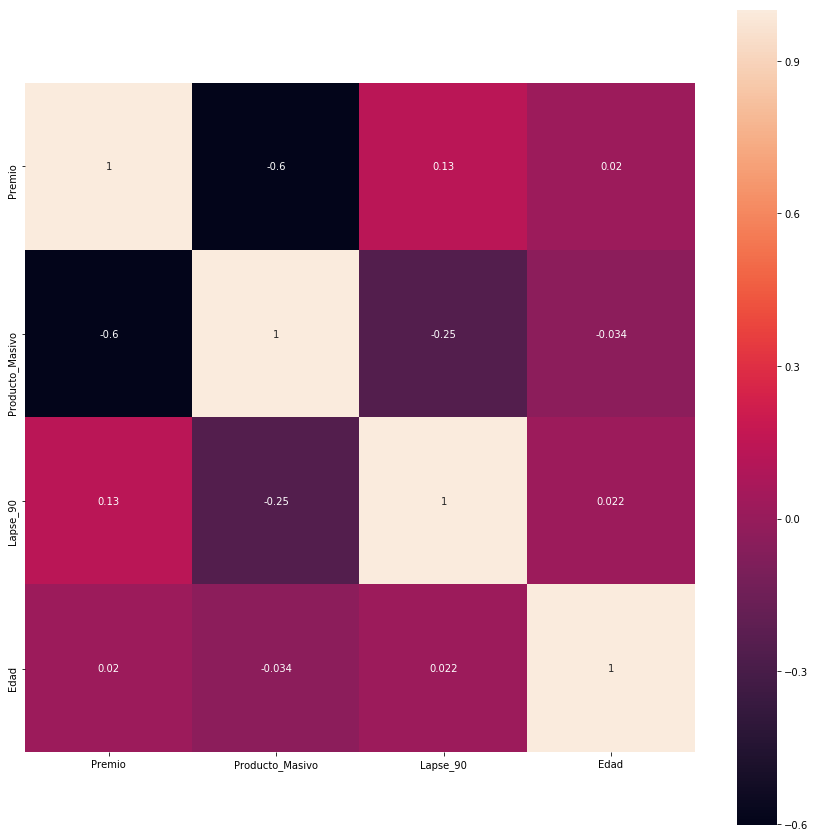

In [27]:
#Graficamos la matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

Notamos una fuerte correlacion negativa entre Premio y Producto Masivo. Esto es logico, ya que estos ultimos suelen tener premios muy bajos.

# Modelado

### Creamos variables dummies para todas las variables categoricas

In [28]:
#Producto
df = pd.concat([df, pd.get_dummies(data = df['Producto'], prefix= 'prod')], axis = 1)

#Ramo
df = pd.concat([df, pd.get_dummies(data = df['Ramo'], prefix= 'ramo')], axis = 1)

#Sexo
df = pd.concat([df, pd.get_dummies(data = df['Sexo'], prefix= 'sex')], axis = 1)

#Provincia
df = pd.concat([df, pd.get_dummies(data = df['Provincia'], prefix= 'prov')], axis = 1)

#Medio_Venta
df = pd.concat([df, pd.get_dummies(data = df['Medio_Venta'], prefix= 'mvta')], axis = 1)

#Punto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Punto_Venta'], prefix= 'ptovta')], axis = 1)

#Puesto_Venta
df = pd.concat([df, pd.get_dummies(data = df['Puesto_Venta'], prefix= 'pstovta')], axis = 1)

#Rentabilidad
df = pd.concat([df, pd.get_dummies(data = df['Rentabilidad'], prefix= 'rtb')], axis = 1)

#Segmento
df = pd.concat([df, pd.get_dummies(data = df['Segmento'], prefix= 'segm')], axis = 1)

In [29]:
#Dropeamos las columnas originales

df = df.drop(columns=['Producto', 'Ramo', 'Sexo','Provincia','Medio_Venta','Punto_Venta','Puesto_Venta','Rentabilidad','Segmento'])

In [30]:
df.head()

,Premio,Producto_Masivo,Lapse_90,Edad,prod_AP Autonomos,prod_AP Autonomos Naranja,prod_AP Capital Uni. Amer. Assist,prod_AP Capital Uniforme - Sin Serv,prod_AP c Inv Kiosco Naranja,prod_ATM Plus,...,segm_Completos,segm_Debitador,segm_Debitador Con Financ.,segm_Esporadico,segm_Esporádico,segm_Mixto,segm_Mixto Con Financ.Z,segm_Sin Segmento,segm_Tx Con Financ.,segm_Tx Sin Financ.
Solicitud_Contrato,,,,,,,,,,,,,,,,,,,,,
232-405557-2407376,30.81,1,0,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
301-100618-390797,36.03,1,0,30.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
304-100723-73514,62.00,0,0,40.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
232-405557-2355690,37.19,1,0,52.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
232-405557-1165633,36.04,1,0,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df.shape

(299549, 129)

#### Importamos las librerias necesarias para el modelado

In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Naive Bayes
Vamos a utilizar un modelo Naive Bayes como un benchmark y tener un punto de partida del cual poder mejorar

In [33]:
#Separamos el dataset en matriz de features y variable objetivo

X =  df.drop(['Lapse_90'], axis = 1)
y = df['Lapse_90']

In [34]:
print(X.shape, y.shape)

(299549, 128) (299549,)


In [35]:
# Separamos nuestro dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
from sklearn.naive_bayes import GaussianNB
modelo_NB = GaussianNB()
modelo_NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [37]:
# Predicción
labels_predichas = modelo_NB.predict(X_test)

In [38]:
#Analizamos la performance del modelo
from sklearn.metrics import confusion_matrix
% matplotlib inline

In [39]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
NB_accuracy = accuracy_score(y_test, labels_predichas)
accuracy_score(y_test, labels_predichas)

0.821600256382865

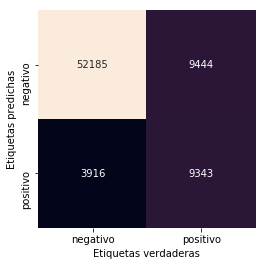

In [40]:
# Ahora calculamos la matriz de confusión
mat = confusion_matrix(y_test, labels_predichas)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

## Conclusion

El modelo de Naive Bayes arrojo una accuracy de 82%. Este es el resultado que vamos a querer mejorar mediante la aplicacion de otros modelos de clasificacion.

### Regresion Logistica

Vamos a probar un modelo de regresion logistica con cross-validation. Vamos a probar con una lista de valores posibles del hiperparametro C y 5 folds

In [41]:
from sklearn import linear_model

from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro C
# Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame

#Lista de Diccionarios
scores_para_df = []

# Defino algunos valores para C
C_tunning = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for i in C_tunning:
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    lg = linear_model.LogisticRegression(C=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
    
    # Para cada valor de C, creo un diccionario con el valor de C y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'C':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [42]:
# Pasamos el diccionario de scores a un dataframe para verlo mas comodamente
scores = pd.DataFrame(scores_para_df)
scores

,C,score_medio,score_std
0,0.0001,0.773726,0.000901
1,0.0010,0.832895,0.000649
2,0.0100,0.852249,0.000522
3,0.1000,0.858249,0.000830
4,1.0000,0.859499,0.000736
5,10.0000,0.859566,0.000785
6,100.0000,0.859660,0.000846
7,1000.0000,0.859651,0.000860
8,10000.0000,0.859686,0.000838


Vemos que a medida que aumenta el hiperparametro C, el score medio del modelo aumenta, aunque a partir de 1, ya lo hace muy marginalmente.
Por esto, vamos a tomar como valor optimo para el modelo <b>C = 100 </b>

In [43]:
#Re-entrenamos el modelo, con todo el dataset, con el mejor hiperparametro

#Instanciamos el modelo
lg_final = linear_model.LogisticRegression(C=100)

#Fiteamos
lg_final.fit(X_train, y_train)

#Prediccion sobre test
y_pred_lg_test = lg_final.predict(X_test)

In [44]:
# Calculamos el accuracy
LR_accuracy = accuracy_score(y_test, y_pred_lg_test)
accuracy_score(y_test, y_pred_lg_test)

0.8567594274116013

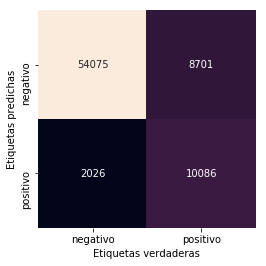

In [45]:
# Matriz de confusión:
mat_lg = confusion_matrix(y_test, y_pred_lg_test)
sns.heatmap(mat_lg.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas');

### CatBoost

CatBoost requiere que todos los datos sean del tipo string o integer. Por lo cual vamos a tener que transformar la variable de premio en integer

In [51]:
df_catboost = df
df_catboost['Premio'] = df_catboost['Premio'].astype(int)

In [65]:
#Separamos el dataset en matriz de features y variable objetivo

X_cb =  df_catboost.drop(['Lapse_90'], axis = 1)
y_cb = df_catboost['Lapse_90']

In [66]:
# Inicializo mis sets de testeo y training
train_data, test_data, train_label, test_label = train_test_split(X_cb, y_cb, test_size=0.25, random_state=1)

In [67]:
from catboost import CatBoostClassifier
# Instanciamos el modelo con los hiperparametros
modelo_catboost = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')

In [68]:
#Entrenamos el modelo
modelo_catboost.fit(train_data, train_label, cat_features=[0,2,5])

0:	learn: 0.4743655	total: 332ms	remaining: 332ms
1:	learn: 0.2841510	total: 529ms	remaining: 0us


In [69]:
# Predecimos las etiquetas del set de testeo
preds_class = modelo_catboost.predict(test_data)
preds_proba = modelo_catboost.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [0. 1. 0. ... 1. 0. 0.]
proba =  [[0.97092653 0.02907347]
 [0.29335992 0.70664008]
 [0.61582802 0.38417198]
 ...
 [0.29335992 0.70664008]
 [0.97092653 0.02907347]
 [0.97092653 0.02907347]]


In [71]:
modelo_catboost.score(train_data, train_label)

0.8871855818321827

In [72]:
modelo_catboost.score(test_data, test_label)

0.8865772887512018